In [2]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import pandas as pd
import os

In [56]:
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers) 
  
def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))

def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b
                                              
def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)                             
    
def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')
    
def regression_diagnostic_plots(table, x, y):
    scatter_fit(table, x, y)
    residual_plot(table, x, y)


In [57]:
sleep = Table.read_table('sleep.csv')
sleep

Pacific Time,Sleep Needed,Relationship,Sleep Time,Sleep Hours,Quality,Ability,GPA
Y,6,P,1,8,3,3,3.8
Y,7,P,2,7,4,5,3.78
Y,8,P,3,8,4,2,3.9
Y,8,P,3,7,4,1,3.01
N,8,P,3,7,5,5,0
Y,8,P,2,8,4,3,3.74
Y,8,P,1,5,2,4,3.7
Y,8,P,3,6,4,4,3.3
N,6,P,6,6,4,4,0
Y,8,P,1.5,6,3,5,4


# Data Breakdown

In [4]:
sleep.num_rows

131

Number of people participated

In [5]:
sleep.group("Pacific Time")

Pacific Time,count
N,45
Y,86


# Data Interpretation

Number of participants in Pacific Time Zoon and Non-Pacific Time Zoon

In [58]:
sleep.group("Relationship")

Relationship,count
N,2
NO,10
P,119


119 out of 131 people think that there is a positive relationship between sleep and academic performance

In [7]:
#sleep needed
np.mean(sleep.column(1))

7.66412213740458

On average people think humans need 7.66 hours/day

In [60]:
#sleep time
np.mean(sleep.column(3))

2.236641221374046

On Average students went to bed at 2.23 AM

In [9]:
#sleep time difference
pacific = sleep.where("Pacific Time", are.equal_to("Y"))
no_pacific = sleep.where("Pacific Time", are.equal_to("N"))
np.mean(pacific.column(3)), np.mean(no_pacific.column(3))

(1.5988372093023255, 3.4555555555555557)

Average bed time:<br>
Pacific: 1:45 AM (student's local time) <br>
Non-Pacific: 3:25 AM (student's local time) <br>

In [11]:
def gpamean(t, x):
    return np.average(t.column(x))

shuffled = pacific_gpa.sample(with_replacement = False)
repetition = 1000
mean_gpa = make_array()

for i in np.arange(repetition):
    simulation = shuffled.sample(37, with_replacement = True)
    mean_gpa = np.append(mean_gpa, gpamean(simulation, 7))
       
lower = percentile(2.5, mean_gpa)
upper = percentile(97.5, mean_gpa)
lower, upper

(3.5737837837837843, 3.7400000000000007)

In [12]:
repetition = 1000
mean_gpa_ = make_array()

shuffled_ = no_pacific_gpa.sample(with_replacement = False)

for i in np.arange(repetition):
    simulation_ = shuffled_.sample(with_replacement = True)
    mean_gpa_ = np.append(mean_gpa_, gpamean(simulation_, 7))  
    
lower = percentile(2.5, mean_gpa_)
upper = percentile(97.5, mean_gpa_)
lower, upper

(3.4745945945945955, 3.702972972972973)

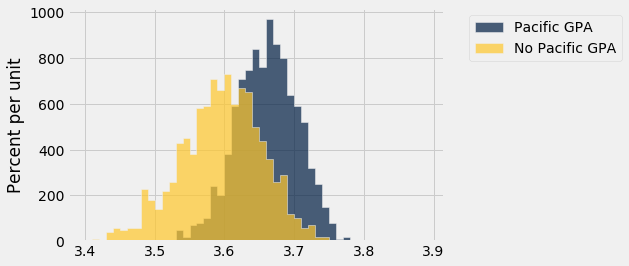

In [61]:
histbin = np.arange(3.4, 3.9, 0.01)
Table().with_columns("Pacific GPA", mean_gpa, "No Pacific GPA", mean_gpa_).hist(bins = histbin)

Cal students who are in Pacific time tends to have higher GPA than Non-Pacific students according to bootstrap test.

In [14]:
new = sleep.with_column("Get Up", sleep.column(3) + sleep.column(4))
new

Pacific Time,Sleep Needed,Relationship,Sleep Time,Sleep Hours,Quality,Ability,GPA,Get Up
Y,6,P,1,8,3,3,3.8,9
Y,7,P,2,7,4,5,3.78,9
Y,8,P,3,8,4,2,3.9,11
Y,8,P,3,7,4,1,3.01,10
N,8,P,3,7,5,5,0,10
Y,8,P,2,8,4,3,3.74,10
Y,8,P,1,5,2,4,3.7,6
Y,8,P,3,6,4,4,3.3,9
N,6,P,6,6,4,4,0,12
Y,8,P,1.5,6,3,5,4,7.5


In [15]:
#Get Up Difference
np.mean(new.where("Pacific Time", are.equal_to("Y")).column("Get Up")),np.mean(new.where("Pacific Time", are.equal_to("N")).column("Get Up"))

(8.63953488372093, 9.766666666666667)

Average wake up time <br>
Pacific Time:8:37 AM (student's local time) <br>
Non-Pacific Time:9:45 AM (student's local time) <br>

In [16]:
#sleep time difference
pacific = sleep.where("Pacific Time", are.equal_to("Y"))
no_pacific = sleep.where("Pacific Time", are.equal_to("N"))
np.mean(pacific.column(3)), np.mean(no_pacific.column(3))

(1.5988372093023255, 3.4555555555555557)

Average bedtime<br>
Pacific Time:1:36 AM (student's local time)<br>
Non-Pacific Time:3:27 AM (student's local time) 

In [17]:
#sleep hours
np.mean(sleep.column(4))

6.790076335877862

Average hours of sleep (all students)

In [18]:
#sleep hours difference
np.mean(pacific.column(4)), np.mean(no_pacific.column(4))

(7.040697674418604, 6.311111111111111)

Average hours of sleep:<br>
Pacific time: 7 hours<br>
Non-Pacific time: 6.3 hours

In [19]:
#quality
np.mean(sleep.column(5))

3.1068702290076335

Average sleep quality (all students on a scale of 1-5 self-rated)

In [62]:
#quality difference
np.mean(pacific.column(5)), np.mean(no_pacific.column(5))

(3.4069767441860463, 2.533333333333333)

Average sleep quality:<br>
Pacific time: 3.4 <br>
Non-Pacific time: 2.53

In [63]:
#ability
np.mean(sleep.column(6))

3.0839694656488548

Average ability to sleep (all students on a scale of 1-5 self-rated)

In [64]:
#ability difference
np.mean(pacific.column(6)), np.mean(no_pacific.column(6))

(3.244186046511628, 2.7777777777777777)

Average ability to sleep:<br>
Pacific time: 3.2 <br>
Non-Pacific time: 2.77

In [23]:
#GPA
gpa = sleep.where("GPA", are.above(1))
np.mean(gpa.column(7))

3.636944444444444

Average GPA of all students

In [24]:
#GPA difference
np.mean(gpa.where("Pacific Time", are.equal_to("Y")).column(7)), np.mean(gpa.where("Pacific Time", are.equal_to("N")).column(7))

(3.6592957746478874, 3.594054054054054)

Average GPA:<br>
Pacific time: 3.66 <br>
Non-Pacific time: 3.59

In [25]:
#sleep time for high GPA, sleep time for low GPA
gpa1 = gpa.where("GPA", are.above(3.60))
gpa2 = gpa.where("GPA", are.below(3.60))
np.mean(gpa1.column(3)), np.mean(gpa2.column(3))

(1.791044776119403, 2.4722222222222223)

Student who has GPA above 3.6 went to bed at 1:47 AM on average<br>
Student who has GPA below 3.6 went to bed at 2:30 AM on average<br>

In [26]:
#sleep hours for high GPA, sleep hours for low GPA
np.mean(gpa1.column(4)), np.mean(gpa2.column(4))

(7.029850746268656, 6.680555555555555)

Student who has GPA above 3.6 on average slept 7 hours a night this past semester<br>
Student who has GPA below 3.6 on average slept 6.68 hours a night this past semester<br>

In [27]:
#quality for high GPA, quality for low GP
np.mean(gpa1.column(5)), np.mean(gpa2.column(5))

(3.2388059701492535, 2.8333333333333335)

Students with higher GPA reported higher sleep quality

In [61]:
#ability for high GPA, ability for low GPA
np.mean(gpa1.column(6)),np.mean(gpa2.column(6))

(3.1492537313432836, 2.9722222222222223)

Students with higher GPA reported better ability to fall asleep

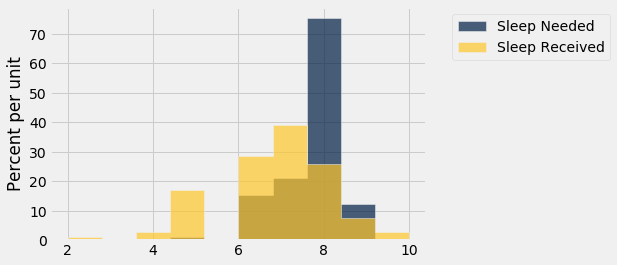

In [62]:
sleep.relabel("Sleep Hours", "Sleep Received").hist("Sleep Needed", "Sleep Received")

Amount of sleep students think they need VS amount of sleep received for the past semester.

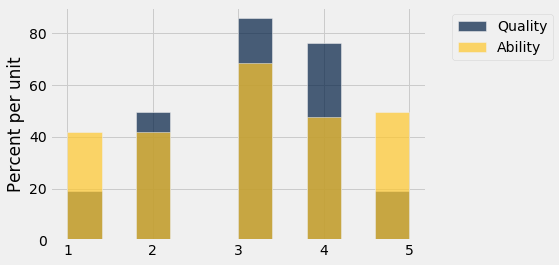

In [65]:
sleep.hist("Quality","Ability")

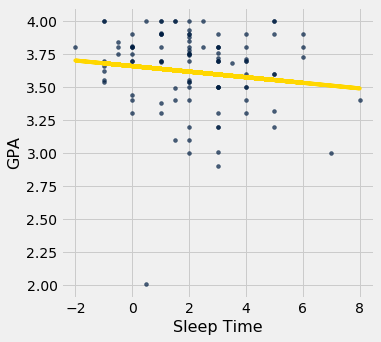

In [54]:
scatter_fit(gpa, "Sleep Time", "GPA")

In [55]:
print(correlation(gpa, "Sleep Time", "GPA"))

-0.13316869261206643


There is a negative correlation between bedtime(hours from 10 pm) and GPA, with a 0.133 r-value.

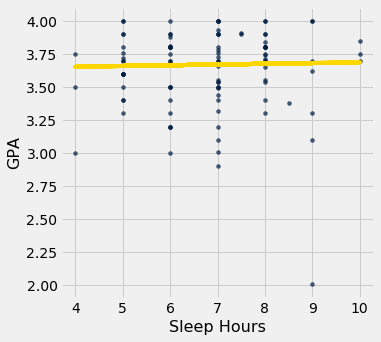

In [52]:
scatter_fit(gpa, "Sleep Hours", "GPA")

In [53]:
print(correlation(gpa, "Sleep Hours", "GPA"))

0.024583184465485384


Our data did not show a correlation between hours of sleeping and GPA